# AMAZON FOOD REVIEW SENTIMENT ANALYSIS - RANA SELIM 19COMP1009

Sentiment Analysis: Pretrained model takes the input from the text description and outputs the sentiment score ranging from -1 to +1 for each sentence

In [1]:
import pandas as pd
import numpy as пр
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(R'C:\Users\rana0\Desktop\NLP PROJECT\Reviews.csv')

https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews?resource=download&select=Reviews.csv

Data includes:

    Reviews from Oct 1999 - Oct 2012
    568,454 reviews
    256,059 users
    74,258 products
    260 users with > 50 reviews

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Score, Summary and Text are the important ones here

In [4]:
df.Summary.head()

0    Good Quality Dog Food
1        Not as Advertised
2    "Delight" says it all
3           Cough Medicine
4              Great taffy
Name: Summary, dtype: object

In [5]:
df.Text.head()

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
Name: Text, dtype: object

I need to do Text Preprocessing here to get rid of the words such as "as","at","a" etc. and to get rid of capital letters 

In [6]:
df.shape

(568454, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


# Text Preprocessing

I used TextBlob Library for text preprocessing.

In [8]:
from nltk.corpus import stopwords 
from textblob import TextBlob
from textblob import Word

### Lower casing and removing punctuations

In [9]:
df['Text'] = df['Text'].apply(lambda x: " ".join(x.lower() for
x in x.split()))


df['Text'] = df['Text'].str.replace('[^\w\s]', "")

C:\Users\rana0\AppData\Local\Temp\ipykernel_33240\137893334.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Text'] = df['Text'].str.replace('[^\w\s]', "")


In [10]:
df.Text.head(5)

0    i have bought several of the vitality canned d...
1    product arrived labeled as jumbo salted peanut...
2    this is a confection that has been around a fe...
3    if you are looking for the secret ingredient i...
4    great taffy at a great price there was a wide ...
Name: Text, dtype: object

### Removal of stopwords

In [11]:
stop = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in
x.split() if x not in stop))
df.Text.head()

0    bought several vitality canned dog food produc...
1    product arrived labeled jumbo salted peanutsth...
2    confection around centuries light pillowy citr...
3    looking secret ingredient robitussin believe f...
4    great taffy great price wide assortment yummy ...
Name: Text, dtype: object

### Lemmatization

In [12]:
df['Text'] = df['Text'].apply(lambda x: " ".join([Word(word).
lemmatize() for word in x.split()]))
df.Text.head()

0    bought several vitality canned dog food produc...
1    product arrived labeled jumbo salted peanutsth...
2    confection around century light pillowy citrus...
3    looking secret ingredient robitussin believe f...
4    great taffy great price wide assortment yummy ...
Name: Text, dtype: object

# Visual Representation of Text Data 

I used WordCloud Library for visual representation of text data.

In [13]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import seaborn as sns

In [14]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [15]:
df.Score.value_counts()

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

This is usually referred to as graded or fine-grained sentiment analysis.
5 stars -> Very positive
4 stars -> Positive
3 stars -> Neutral
2 stars -> Negative
1 star -> Very negative

<AxesSubplot:xlabel='Score', ylabel='count'>

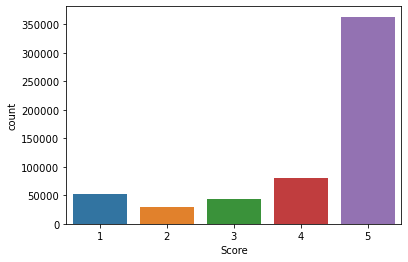

In [16]:
sns.countplot(data = df, x = 'Score')

### Create a new data frame "reviews" to perform exploratory data analysis upon that and dropping null values

In [17]:
reviews = df
reviews.dropna(inplace=True)

In [18]:
score_1 = reviews[reviews['Score'] == 1]
score_2 = reviews[reviews['Score'] == 2]
score_3 = reviews[reviews['Score'] == 3]
score_4 = reviews[reviews['Score'] == 4]
score_5 = reviews[reviews['Score'] == 5]

In [19]:
reviews_sample = pd.concat([score_1,score_2,score_3,score_4,score_5],axis=0)

reviews_sample.reset_index(drop=True,inplace=True)

Wordcloud function's input needs to be a single string of text.
Concatenating all Summaries into a single string.

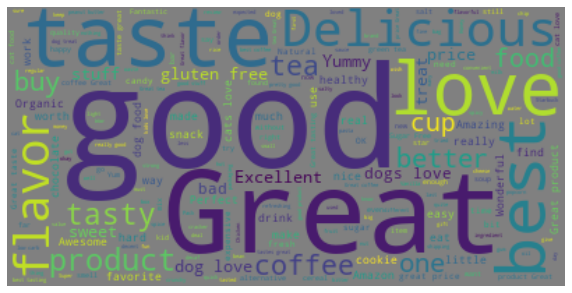

In [20]:
reviews_str = reviews_sample.Summary.str.cat()
wordcloud = WordCloud(background_color='grey').generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

### Spliting the data into Negative (Score is 1 or 2) and Positive (4 or #5) Reviews.

In [21]:
negative_reviews = reviews_sample[reviews_sample['Score'].isin([1,2]) ]
positive_reviews = reviews_sample[reviews_sample['Score'].isin([4,5]) ]

Transform to single string

In [22]:
negative_reviews_str = negative_reviews.Summary.str.cat()
positive_reviews_str = positive_reviews.Summary.str.cat()

### Create WordCloud for Positive and Negative Data

In [23]:
wordcloud_positive = WordCloud(background_color='green').generate(positive_reviews_str)
wordcloud_negative = WordCloud(background_color='red').generate(negative_reviews_str)

Reviews with Positive Scores

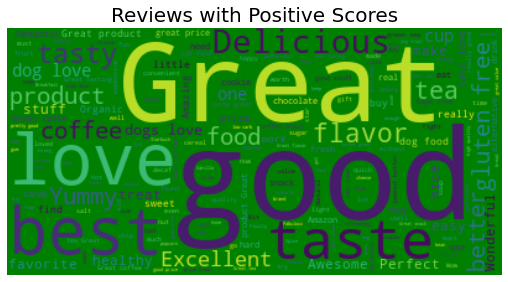

In [24]:
fig = plt.figure(figsize=(10,10))
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positive,interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Reviews with Positive Scores',fontsize=20)
plt.show()

Reviews with Negative Scores

Text(0.5, 1.0, 'Reviews with Negative Scores')

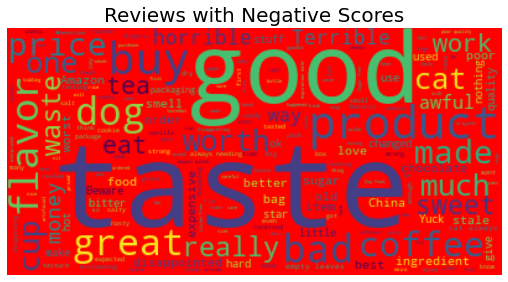

In [25]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Reviews with Negative Scores',fontsize=20)

# Sentiment Score

I used VADER (Valence Aware Dictionary and Sentiment Reasoner) to analyze the Sentiment Score of the project. 
It is a sentiment analysis tool that is specifically attuned to sentiments expressed in social media. VADER uses a combination of A sentiment lexicon is a list of lexical features (e.g., words) which are generally labeled according to their semantic orientation as either positive or negative. VADER not only tells about the Positive and Negative score but also tells us about how much positive or negative a sentiment is.

In [26]:
import re
import os
import sys
import ast
plt.style.use('fivethirtyeight')

Function for getting the sentiment

In [27]:
cp = sns.color_palette()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

Generating sentiment for all the sentences in the dataset

In [28]:
emptyline=[]
for row in df['Text']:
    
    vs=analyzer.polarity_scores(row)
    emptyline.append(vs)

Creating new dataframe with sentiments

In [29]:
df_sentiments=pd.DataFrame(emptyline)
df_sentiments.head()

,neg,neu,pos,compound
0,0.000,0.503,0.497,0.9413
1,0.129,0.762,0.110,-0.1027
2,0.130,0.587,0.283,0.8532
3,0.000,0.854,0.146,0.4404
4,0.000,0.369,0.631,0.9468


Columns refers to Negative, Neutral, Positive and Compound.
The compound score is the sum of positive, negative & neutral scores which is then normalized between -1(most extreme negative) and +1 (most extreme positive). The more Compound score closer to +1, the higher the positivity of the text.

### Merging the sentiments back to reviews dataframe

In [30]:
df.drop(['Id','ProductId','UserId','ProfileName','HelpfulnessNumerator','HelpfulnessDenominator','Time']
        , axis=1, inplace=True)

df_c = pd.concat([df.reset_index(drop=True), df_sentiments], axis=1)
df_c.head(3)

,Score,Summary,Text,neg,neu,pos,compound
0,5,Good Quality Dog Food,bought several vitality canned dog food produc...,0.000,0.503,0.497,0.9413
1,1,Not as Advertised,product arrived labeled jumbo salted peanutsth...,0.129,0.762,0.110,-0.1027
2,4,"""Delight"" says it all",confection around century light pillowy citrus...,0.130,0.587,0.283,0.8532


Converting compound into positive and negative scores using threshold. If it is greater than 0, than it is positive and

In [32]:
import numpy as np

df_c['Sentiment'] = np.where(df_c['compound'] >= 0 , 'Positive','Negative')
df_c.head(5)

,Score,Summary,Text,neg,neu,pos,compound,Sentiment
0,5,Good Quality Dog Food,bought several vitality canned dog food produc...,0.000,0.503,0.497,0.9413,Positive
1,1,Not as Advertised,product arrived labeled jumbo salted peanutsth...,0.129,0.762,0.110,-0.1027,Negative
2,4,"""Delight"" says it all",confection around century light pillowy citrus...,0.130,0.587,0.283,0.8532,Positive
3,2,Cough Medicine,looking secret ingredient robitussin believe f...,0.000,0.854,0.146,0.4404,Positive
4,5,Great taffy,great taffy great price wide assortment yummy ...,0.000,0.369,0.631,0.9468,Positive


# Result

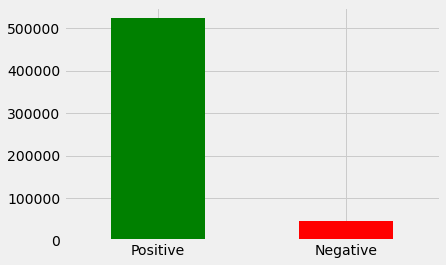

In [35]:
result = df_c['Sentiment'].value_counts()
result.plot(kind='bar', rot=0, color=['green','red']);

My conclusion from these results are even if the approximate score rate in the data table is 5,4 (Sum of the 5-4 stars are 443.777 and 2-1 stars are 82.037 so approximate rate is 5,4) we see that sentimental result rate is 10. So it means that 1 or 2 star reviews may contain highly positive comments.